# Exploratory Data Analysis on the Brooklyn Borough Data

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#Reading dataset
data = pd.read_csv('brooklyn_mv_collision.csv')

In [103]:
#Adding a new columns for weekday where 0 reprents Monday and 6 represents Sunday
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['weekday'] = data['timestamp'].dt.weekday

In [104]:
#Printing first 5 values of the dataset
data.head()

,borough,collision_factor,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,...,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code,year,month,day,hour,count,weekday
0,BROOKLYN,Failure to Yield Right-of-Way,2021-04-14 18:55:00,40.642002,-73.898834,"(40.642002, -73.898834)",0,0,1,0,...,1.0,0.0,4407405,11236.0,2021,4,14,18,1,2
1,BROOKLYN,Other Vehicular,2021-04-24 09:50:00,40.676495,-73.913704,"(40.676495, -73.913704)",0,0,0,0,...,0.0,0.0,4410076,11233.0,2021,4,24,9,1,5
2,BROOKLYN,Driver Inattention/Distraction,2021-05-05 18:10:00,40.676548,-73.963540,"(40.676548, -73.96354)",1,0,0,0,...,1.0,0.0,4414100,11238.0,2021,5,5,18,1,2
3,BROOKLYN,Traffic Control Disregarded,2021-05-31 18:08:00,40.673275,-73.868530,"(40.673275, -73.86853)",0,0,1,0,...,1.0,0.0,4422459,11208.0,2021,5,31,18,1,0
4,BROOKLYN,Traffic Control Disregarded,2021-06-10 03:47:00,40.670986,-73.984795,"(40.670986, -73.984795)",0,0,0,0,...,0.0,0.0,4425639,11215.0,2021,6,10,3,1,3


Text(0, 0.5, 'Count')

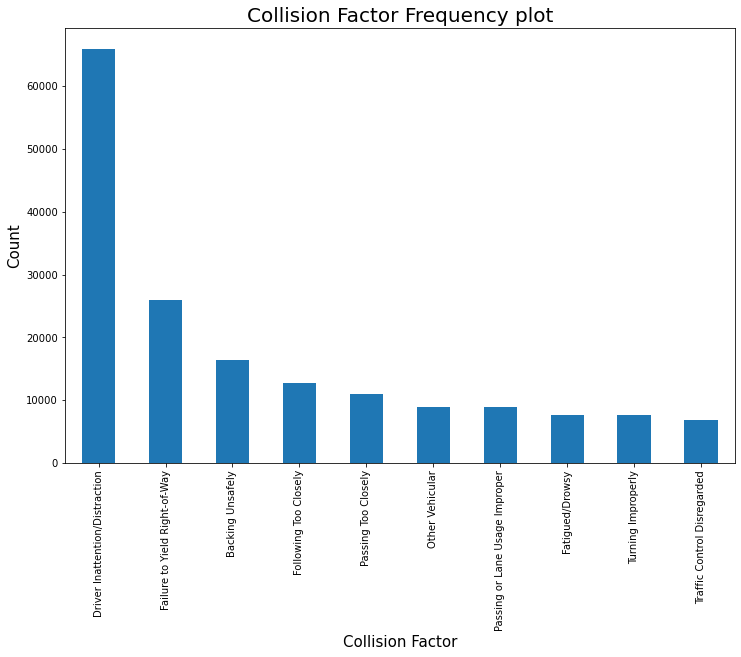

In [10]:
#Plotting the unique Collision factor and their frequencies
plt.figure(figsize=(12,8))
data['collision_factor'].value_counts()[:10].plot(kind='bar')
plt.title('Collision Factor Frequency plot', size=20)
plt.xlabel('Collision Factor', size=15)
plt.ylabel('Count', size=15)

As we can observe from the above plot, the first five factors are the reasons because of which the police have to observe accidents over 10,000 in total with Driver's Inattention or distraction leading exceptionally in the list.

In [43]:
#Grouping the data for each year using their sum
agg_df = data.groupby(['year']).agg('sum')
agg_df

,latitude,longitude,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code,month,day,hour,count
year,,,,,,,,,,,,,,,,
2012,3.178908e+05,-5.782991e+05,321,1,1761,5,527,10,2610.0,16.0,1239450020,87725789.0,74906,121840,106133,7819
2013,6.324802e+05,-1.150631e+06,553,1,3578,22,1145,8,5276.0,31.0,2483662902,174540592.0,104376,242428,210647,15557
2014,7.844326e+05,-1.426988e+06,652,2,4090,10,1332,27,6074.0,39.0,21982791244,216469069.0,132814,302357,260876,19294
2015,9.861048e+05,-1.793772e+06,826,3,4908,12,1434,25,7168.0,40.0,78976037872,272163637.0,162224,374993,324034,24258
2016,1.123294e+06,-2.043134e+06,1054,4,6788,6,1773,15,9654.0,27.0,109333463588,352169510.0,207839,494407,415282,31391
2017,1.259032e+06,-2.289984e+06,1013,6,6254,13,1703,14,8961.0,32.0,117351635373,355205864.0,207435,496125,420641,31662
2018,1.307274e+06,-2.377742e+06,1035,1,6802,14,1819,13,9655.0,28.0,129149716248,368000410.0,216535,512897,437532,32801
2019,1.243176e+06,-2.261082e+06,1080,9,6884,12,1701,17,9665.0,38.0,129992786682,350343440.0,203687,488145,410716,31227
2020,6.720110e+05,-1.222203e+06,1194,9,4707,21,1185,15,7086.0,45.0,73161962948,189793659.0,103902,262678,223716,16917


Text(0, 0.5, 'Count')

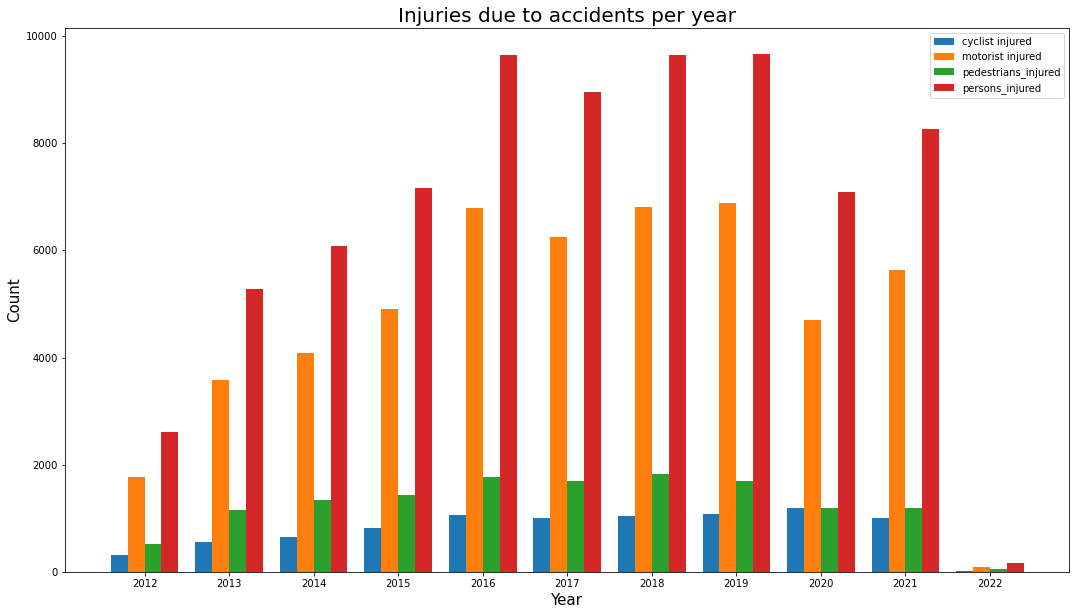

In [77]:
#Comparing the injuries due to accidents for each year
plt.figure(figsize=(18,10))
plt.bar(agg_df.index -0.4, agg_df['number_of_cyclist_injured'], width=0.2, align='edge', label='cyclist injured')
plt.bar(agg_df.index -0.2, agg_df['number_of_motorist_injured'], width=0.2, align='edge', label='motorist injured')
plt.bar(agg_df.index +0.0, agg_df['number_of_pedestrians_injured'], width=0.2, align='edge', label='pedestrians_injured')
plt.bar(agg_df.index +0.2, agg_df['number_of_persons_injured'], width=0.2, align='edge', label = 'persons_injured')
plt.xticks(ticks = agg_df.index)
plt.legend()
plt.title('Injuries due to accidents per year', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count', size=15)

As we can observe from the above grouped bar plot, the number of people getting injured in motor collision accidents increased by 27% in four years from 2012 to 2016 and the ratio is maintained constantly every year since because of negligence by the city council and taking no actions to prevent these cases. The motorists were the most unlucky among other people as understandable due to the risk of falling from the vehicle as most common reason. 

Text(0, 0.5, 'Count')

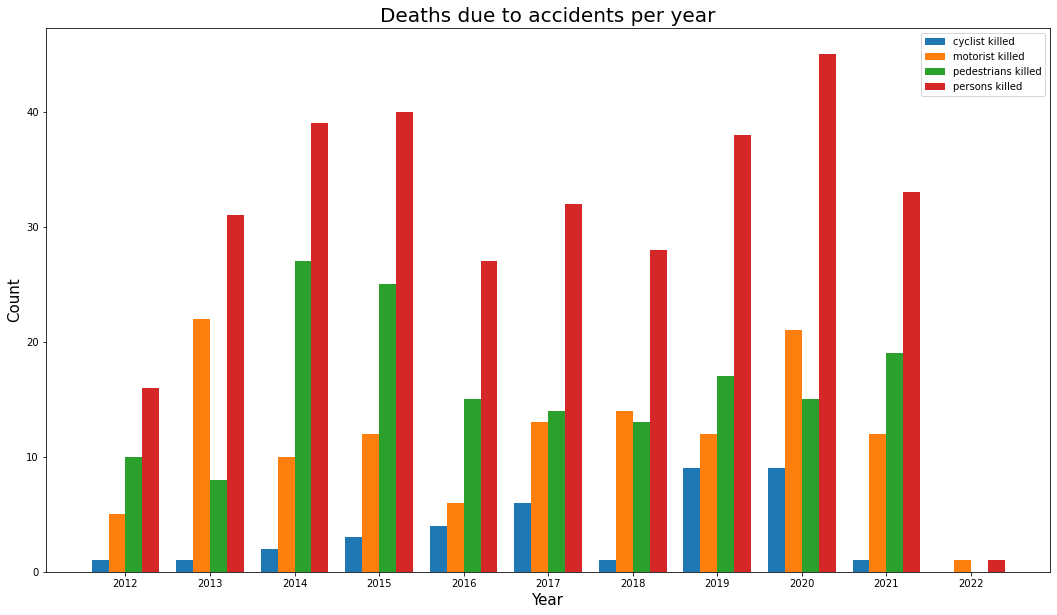

In [86]:
#Comparing the deadths due to accidents for each year
plt.figure(figsize=(18,10))
plt.bar(agg_df.index -0.4, agg_df['number_of_cyclist_killed'], width=0.2, align='edge', label='cyclist killed')
plt.bar(agg_df.index -0.2, agg_df['number_of_motorist_killed'], width=0.2, align='edge', label='motorist killed')
plt.bar(agg_df.index +0.0, agg_df['number_of_pedestrians_killed'], width=0.2, align='edge', label='pedestrians killed')
plt.bar(agg_df.index +0.2, agg_df['number_of_persons_killed'], width=0.2, align='edge', label = 'persons killed')
plt.xticks(ticks = agg_df.index)
plt.legend()
plt.title('Deaths due to accidents per year', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count', size=15)

The number of deaths are very low as compared to injuries in road accidents and can be prevented by the constant efforts put by the city council to improve the methods in prevention of road accidents by extent. 

In [107]:
#Grouping by weekly and hourly
day_hour = data.groupby(['weekday', 'hour']).agg('sum')
day_hour = day_hour.reset_index()
day_hour

,weekday,hour,latitude,longitude,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code,year,month,day,count
0,0,0,36351.256263,-66108.909087,28,1,293,0,44,3,368.0,4.0,3272216491,10321289.0,1856133,6253,14269,920
1,0,1,15939.378895,-28987.019984,11,0,133,2,16,0,162.0,2.0,1372583597,4476524.0,804913,2819,6154,399
2,0,2,10816.143227,-19669.417408,8,0,110,0,12,0,131.0,0.0,879927750,3029012.0,544639,1863,4072,270
3,0,3,8497.599675,-15454.762744,3,0,62,1,4,1,69.0,2.0,716969785,2434762.0,437709,1441,3211,217
4,0,4,10124.660313,-18412.389318,6,0,87,0,9,1,103.0,1.0,829013101,2849453.0,512349,1758,3872,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,6,19,50614.066838,-92072.908039,77,0,380,0,99,1,560.0,1.0,4255909669,14451020.0,2597863,8655,20095,1288
164,6,20,47689.346983,-86747.548680,79,0,401,1,83,2,566.0,3.0,3945011320,13463069.0,2420412,8097,18503,1200
165,6,21,43013.417731,-78239.394518,68,0,356,2,84,0,509.0,2.0,3611763256,12274322.0,2206667,7282,17213,1094
166,6,22,37770.198906,-68698.028422,38,0,347,2,43,0,434.0,2.0,3057538567,10567770.0,1899932,6422,13998,942


In [115]:
#Creating pivot table for heatmap
piv = pd.pivot_table(day_hour, values='number_of_persons_injured', index = 'weekday', columns='hour', fill_value=0)

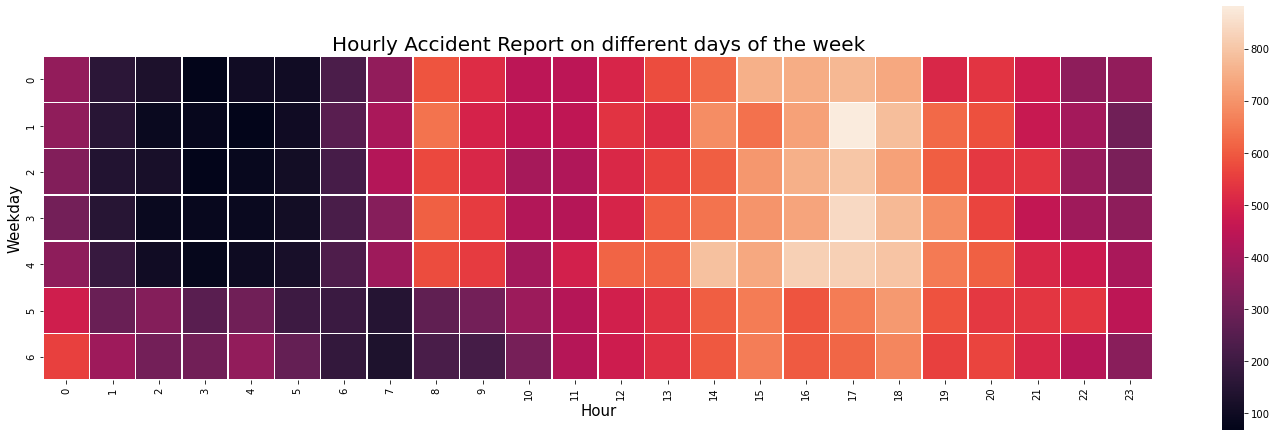

In [123]:
#Plotting heatmap for injuries data hourly on weekdays
plt.figure(figsize=(20, 15))
ax = sns.heatmap(piv, square=True, linewidths=0.5, cbar_kws={'shrink': 0.4})
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.title('Injuries due to accidents per hour on different days of the week', size=20)
plt.xlabel('Hour', size=15)
plt.ylabel('Weekday', size=15)
plt.show()

The total persons injured during different hours (cyclist + motorists + pedestrians = persons) as shown in the heatmap. The number of injuries due to accidents reported over 500 per hour are from 8th to 20th hour from Monday(0) to Friday(4) indicating work hour rush and mostly post lunch and after work hours. The same timings changes for the remaining days which are the weekends where the injuries due to accidents reported over 500 are from 12th to 22nd hour. It was surprising to observe that on the weekends, more than 200 injury due to accidents was reported almost every hour where as on the weekdays, the number remains below 100.

Since the number of deaths reported are very very low as compared to the injuries, a heatmap is not an ideal solution to visualise the deaths per hour data.

In [127]:
#Grouping the data by month and weekday
month_day = data.groupby(['month', 'weekday']).agg('sum')
month_day = month_day.reset_index()
month_day

,month,weekday,latitude,longitude,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_persons_injured,number_of_persons_killed,unique_key,zip_code,year,day,hour,count
0,1,0,103917.071577,-189026.407447,51,0,546,1,189,2,786.0,3.0,8537787356,29035296.0,5220736,40244,34337,2588
1,1,1,110422.460007,-200858.467354,50,1,540,1,251,2,843.0,4.0,8894770436,30829634.0,5543364,43357,35345,2748
2,1,2,106112.265581,-193021.229118,50,0,522,0,188,1,758.0,1.0,8624970468,29764611.0,5351988,42622,34945,2653
3,1,3,111971.866973,-203669.879242,70,1,491,0,216,3,778.0,4.0,8895995877,31200430.0,5611903,45274,37145,2782
4,1,4,113887.473802,-207136.560241,54,1,561,1,195,4,810.0,6.0,9111075061,31760921.0,5710768,44929,37275,2831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,12,2,115137.341532,-209441.209755,76,1,576,1,257,6,915.0,8.0,9589637279,32276738.0,5801561,44801,39541,2877
80,12,3,119895.608962,-218088.925197,68,0,658,2,233,1,968.0,3.0,10086593245,33591395.0,6037812,47073,40507,2994
81,12,4,125592.245351,-228436.653600,84,1,695,2,259,4,1044.0,7.0,10321672941,35116536.0,6311869,47932,41718,3130
82,12,5,103267.135003,-187837.926476,65,0,589,3,179,1,837.0,4.0,8393418988,28889283.0,5192448,39209,33095,2575


In [149]:
#Pivot table for new group
piv1 = pd.pivot_table(month_day, values='number_of_persons_injured', index = 'weekday', columns='month', fill_value=0)

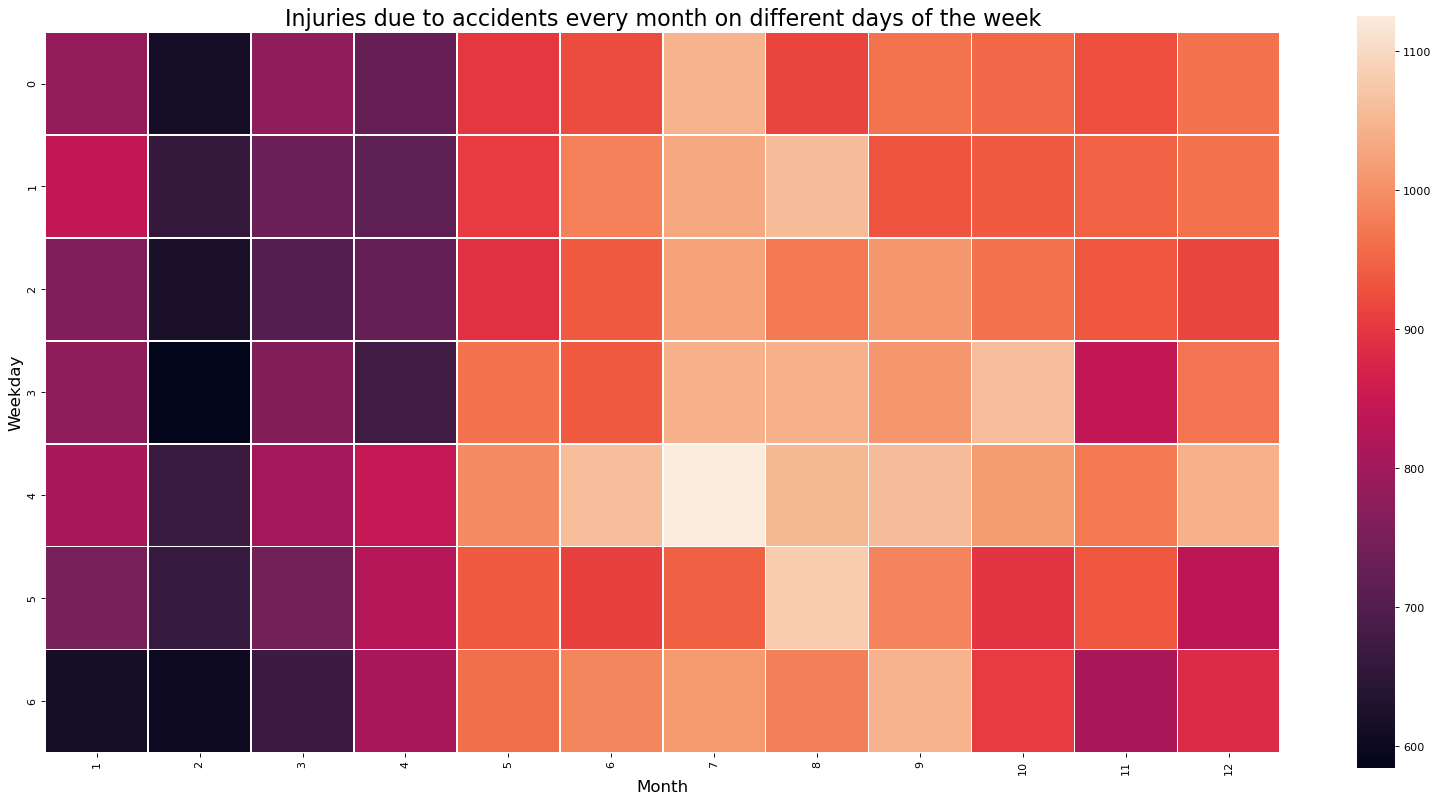

In [153]:
#Plotting heatmap for injuries by weekdays for every month
plt.figure(figsize=(20, 10), dpi=80)
ax = sns.heatmap(piv1, square=True, linewidths=0.5, cbar_kws={'shrink': 1}, fmt='.2f')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.title('Injuries due to accidents every month on different days of the week', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Weekday', size=15)
plt.show()

For first four months till April, the average number of injuries reported on different weekdays was 700 but since May it increased to nearly 1000 throughout the year. It is clear that the city council needs to update its terms and methods to make the horrifying events which is happening on the streets of brooklyn irrespective of hour, day, week or month every year. 

In [187]:
#Investigating the collision factor - Driver Inattention/Distraction
new_df = pd.DataFrame(columns=['collision_factor', 'injuries', 'deaths'])
new_df['collision_factor'] = ['Driver Inattention/Distraction', 'Others']

In [191]:
#Deternining the frequency of each category using the traditional raw way
inj_cf = 0
inj_oth = 0
dth_cf = 0
dth_oth = 0

for i in range(len(data)):
    
    if data['collision_factor'][i] == 'Driver Inattention/Distraction':
        inj_cf += data['number_of_persons_injured'][i]
        dth_cf += data['number_of_persons_killed'][i]
    
    else:
        inj_oth += data['number_of_persons_injured'][i]
        dth_oth += data['number_of_persons_killed'][i]

In [192]:
#Adding the new values to the new dataframe
new_df['injuries'] = [inj_cf, inj_oth]
new_df['deaths'] = [dth_cf, dth_oth]
#Percent injury and deaths
pct_inj = []
pct_dth = []

for i in range(new_df.shape[0]):
    pct1 = (new_df.injuries[i] / sum(new_df.injuries)) * 100
    pct2 = (new_df.deaths[i] / sum(new_df.deaths)) * 100
    pct_inj.append(round(pct1,2))
    pct_dth.append(round(pct2,2))

new_df['percent_injury'] = pct_inj
new_df['percent_death'] = pct_dth

In [199]:
new_df

,collision_factor,injuries,deaths,percent_injury,percent_death
0,Driver Inattention/Distraction,21613.0,62.0,28.98,18.79
1,Others,52958.0,268.0,71.02,81.21


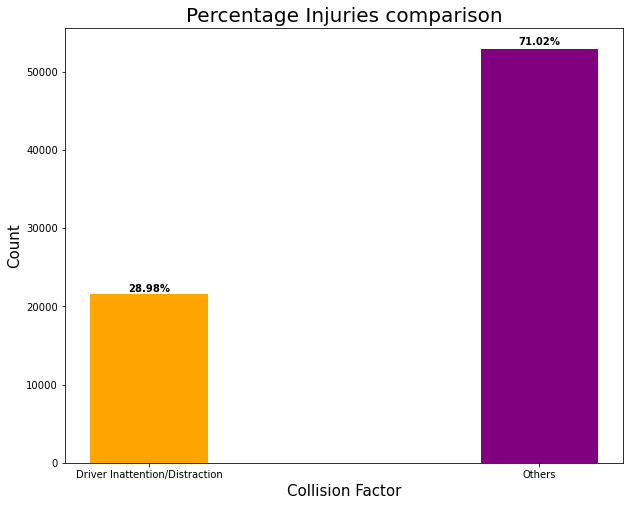

In [202]:
#Plotting the percent injury comparison
plt.figure(figsize=(10,8))
colors_list = ['Orange', 'Purple']
graph = plt.bar(new_df['collision_factor'], new_df['injuries'], color = colors_list, width = 0.3)
plt.title('Percentage Injuries comparison', size=20)
plt.xlabel('Collision Factor', size=15)
plt.ylabel('Count', size=15)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(new_df['percent_injury'] [i])+'%',
             ha='center',
             weight='bold')
    i+=1

plt.show()

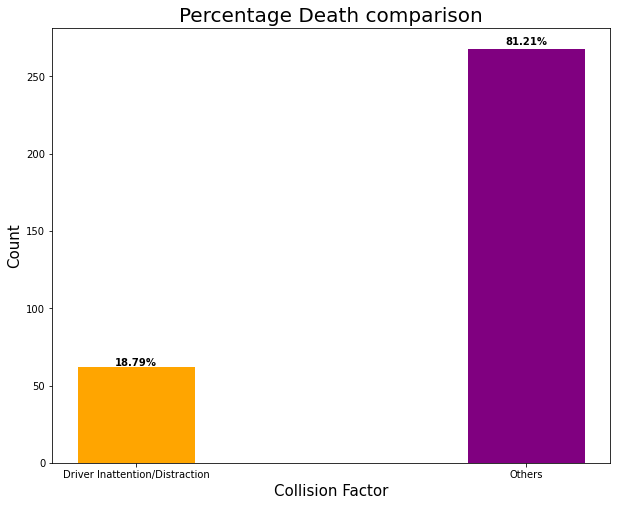

In [203]:
#Plotting the percent deaths comparison
plt.figure(figsize=(10,8))
colors_list = ['Orange', 'Purple']
graph = plt.bar(new_df['collision_factor'], new_df['deaths'], color = colors_list, width = 0.3)
plt.title('Percentage Death comparison', size=20)
plt.xlabel('Collision Factor', size=15)
plt.ylabel('Count', size=15)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(new_df['percent_death'] [i])+'%',
             ha='center',
             weight='bold')
    i+=1

plt.show()

As from these two bar plot shows that the driver's negligence to pay serious attention on road or said so a distraction is a major problem in the city of Brooklyn which is causing around 30% of the accidents leading to only injuries. 18.8% of total deadths are also caused by the same reason. 

# Summary of analysis 

Overall we observed that it is disheartening to see the dereliction of city council due to which the citizens has to suffer. A good proportion of accidents were caused due to driver's negligence on the road or a distraction and is being increased every year. Most accidents occur during business hours and on work days. 

# Recommendation of decreasing accidents in Brooklyn

Based on the above analysis using different visualisations, the suitable recommendations to reduce the number of accidents on the streets of Brooklyn Borough will be public awareness campaigns through various platforms such as billboards, television, social media etc. making people aware of the consequences of neglegence and covering the following bold points:

1. Plan the trip ahead of time keeping the duration of journey, traffic routes in mind to avoid speeding on the streets. 

2. Avoiding distractions as much as possible.

3. Remain calm while driving in heavy traffic or on narrow streets. 

4. Appropriate use of mirrors, and maintaining distance with other vehicles. 
    
5. Respect the speed limit and following traffic rules. 
    
6. Don't drink and drive.

# Future Work

1. Using Tableau to avoid limitations of using Python visualisations for larger datasets. 

2. Using geographical maps in Tableau for plotting the accidental zones using latitudes and longitudes.

3. If weather conditions are also recorded, determining the co-relation between weather and the accidents occured. 